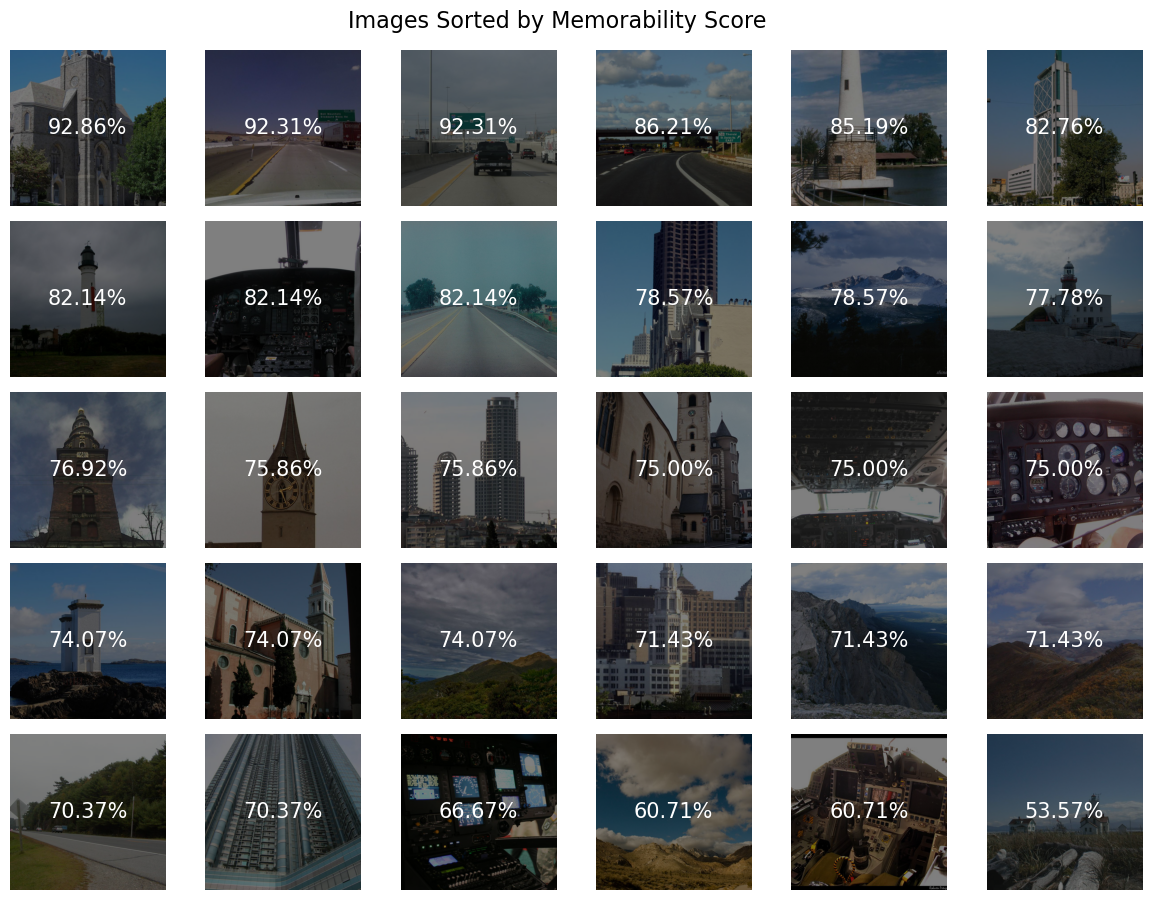

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image, ImageEnhance

# File path for the CSV file containing hit rate scores
csv_file = 'hit_rate_scores.csv'

# Directory containing the images
image_dir = os.path.join('..', '..', 'targetImages')

# Function to process the CSV file and plot the corresponding images
def process_csv_and_plot_images(csv_file, image_dir):
    # Read the CSV file
    csv_file_path = os.path.join('..', '..', csv_file)
    df = pd.read_csv(csv_file_path)

    # Remove 'targetImages\\' and convert hit rate scores to float
    df['Image'] = df['Image'].str.replace('targetImages\\', '')
    df['Hit Rate'] = df['Hit Rate'].str.rstrip('%').astype(float)

    # Sort images based on hit rate score in descending order
    df_sorted = df.sort_values(by='Hit Rate', ascending=False)

    # Calculate the number of images and set up the figure with a fixed number of columns
    num_images = len(df_sorted)
    cols = 6
    rows = (num_images + cols - 1) // cols  # Calculate the number of rows required

    # Set up the figure and axis with specified spacing between subplots
    fig, axes = plt.subplots(rows, cols, figsize=(15, 2 * rows))  # Adjusted the height of the plot
    fig.subplots_adjust(hspace=0.1, wspace=0.05, top=0.95)  # Adjust these values as needed

    # Loop through each image path and plot the images
    for ax, (_, row) in zip(axes.flatten(), df_sorted.iterrows()):
        full_image_path = os.path.join(image_dir, row['Image'])
        score = row['Hit Rate']
        if os.path.isfile(full_image_path):
            # Load the image
            img = Image.open(full_image_path).convert('RGBA')
            
            # Create a dark overlay
            overlay = Image.new('RGBA', img.size, (0, 0, 0, 128))  # The last value is the alpha channel (transparency)
            
            # Blend the overlay with the image
            img_with_shadow = Image.alpha_composite(img, overlay)
            
            # Assign the final image with shadow to 'img' variable
            img = img_with_shadow

            ax.imshow(img)
            ax.text(0.5, 0.5, f'{score:.2f}%', transform=ax.transAxes, color='white', fontsize=15, verticalalignment='center', horizontalalignment='center')
        else:
            ax.text(0.5, 0.5, 'Image not found', horizontalalignment='center', verticalalignment='center', fontsize=12)
        ax.axis('off')  # Hide the axis

    # Add a title to the plot
    plt.suptitle('Images Sorted by Memorability Score', fontsize=16, y=0.99)

    # Save the plot to a file
    plt.savefig('memorabilityRankings.png', bbox_inches='tight')
    plt.show()

# Process and plot images from the hit_rate_scores.csv file
process_csv_and_plot_images(csv_file, image_dir)
